In [1]:
%matplotlib notebook
import IPython.display as ipd
import matplotlib.pyplot as plt
import util
import numpy as np

In [2]:
a, coded_sps_mean_A, coded_sps_std_A, coded_sps_max_A, log_f0s_mean_A, log_f0s_std_A = util.loadPickle('./cache36_suzuki.pkl')
_, coded_sps_mean_B, coded_sps_std_B, coded_sps_max_B, log_f0s_mean_B, log_f0s_std_B = util.loadPickle('./cache36_kinoshita.pkl')
path = 'datasets/suzuki/a01.wav'

In [3]:
# encode
wave = util.loadWave(path)
pwav = util.wavePadding(wave)
f0, sp, ap = util.worldDecompose(pwav)
psf0 = util.pitchConversion(f0, log_f0s_mean_A, log_f0s_std_A, log_f0s_mean_B, log_f0s_std_B)
coded_sp = util.worldEncodeSpectralEnvelop(sp)
coded_sp_t = coded_sp.T
coded_sp_norm = (coded_sp_t - coded_sps_mean_A) / coded_sps_max_A
print(coded_sp_norm.max(), coded_sp_norm.min(), coded_sp_norm.shape, coded_sp_norm.mean())

0.8725651552903959 -0.9931512517056906 (36, 803) -0.006706923533693263


In [4]:
print(coded_sp_norm.shape, coded_sps_mean_A.shape)
# decode
coded_sp_c = coded_sp_norm * coded_sps_max_B + coded_sps_mean_B
coded_sp_c = coded_sp_c.T
coded_sp_c = np.ascontiguousarray(coded_sp_c)
decoded_sp_c = util.worldDecodeSpectralEnvelop(coded_sp_c)
wave_transformed = util.worldSpeechSynthesis(f0, decoded_sp_c, ap)

(36, 803) (36, 1)


<IPython.core.display.Javascript object>


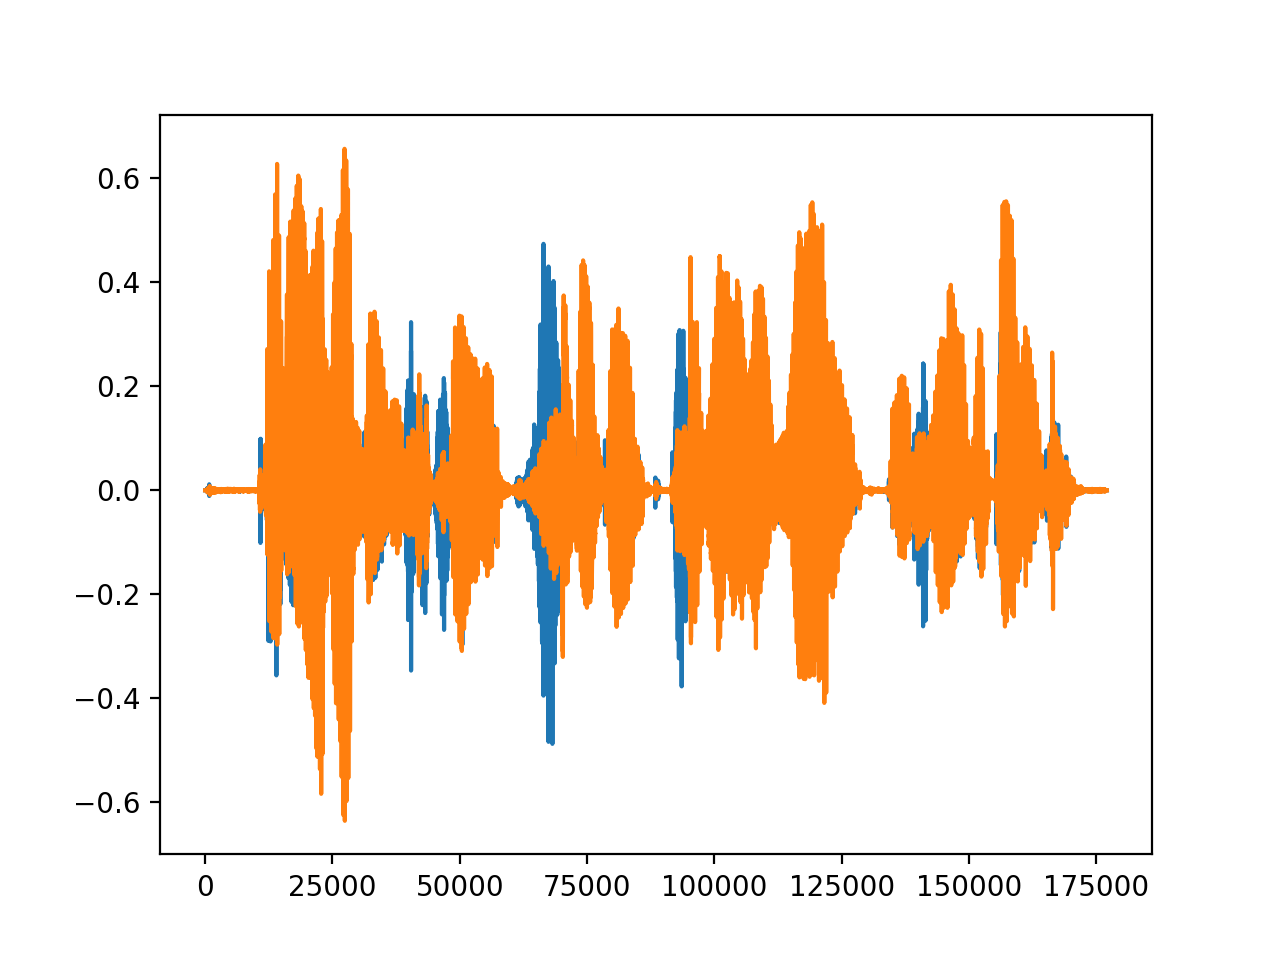

In [5]:
plt.plot(pwav)
plt.plot(wave_transformed)

In [6]:
print(pwav.shape, wave_transformed.shape, ((pwav-wave_transformed) ** 2).mean())

(177061,) (177061,) 0.012568649


In [7]:
ipd.Audio(pwav, rate=44100)

In [8]:
ipd.Audio(wave_transformed, rate=44100)